#---------------------------------------------------------------------------------------------#
 
-- ε: Grado de libertad de la funcion --
 
ε = sqrt(10^(α_max/10)-1)
 
ε = 0.311
ε^2 = 0.096
 
#---------------------------------------------------------------------------------------------#
 
-- N: Orden del filtro --
 
α_min = 10*log(1 + ε^2*C_n^2) con C_n^2= cosh^2(N*cosh^(-1)(ω_s))
 
Para N= 1: ¿att = 2.714 dB >= α_min= 48?
Para N= 2: ¿att = 14.606 dB >= α_min= 48?
Para N= 3: ¿att = 29.762 dB >= α_min= 48?
Para N= 4: ¿att = 45.068 dB >= α_min= 48?
Para N= 5: ¿att = 60.379 dB >= α_min= 48?
 
N= 5
 
#---------------------------------------------------------------------------------------------#
 
-- p_i: Polos en el semiplano derecho obtenidos con roots(p) --
-- del polinomio denominador obtenido de forma analítica --
 
p_0= (-0.11932228274117443+1.0194954351513634j)
p_1= (-0.11932228274117443-1.0194954351513634j)
p_2= (-0.31238979183162363+0.6300828302989071j)
p_3= (-0.31238979183162363-

<IPython.core.display.Math object>

 
#---------------------------------------------------------------------------------------------#
 
-- Módulo, fase, diagrama de polos y ceros y retardo de fase --
 


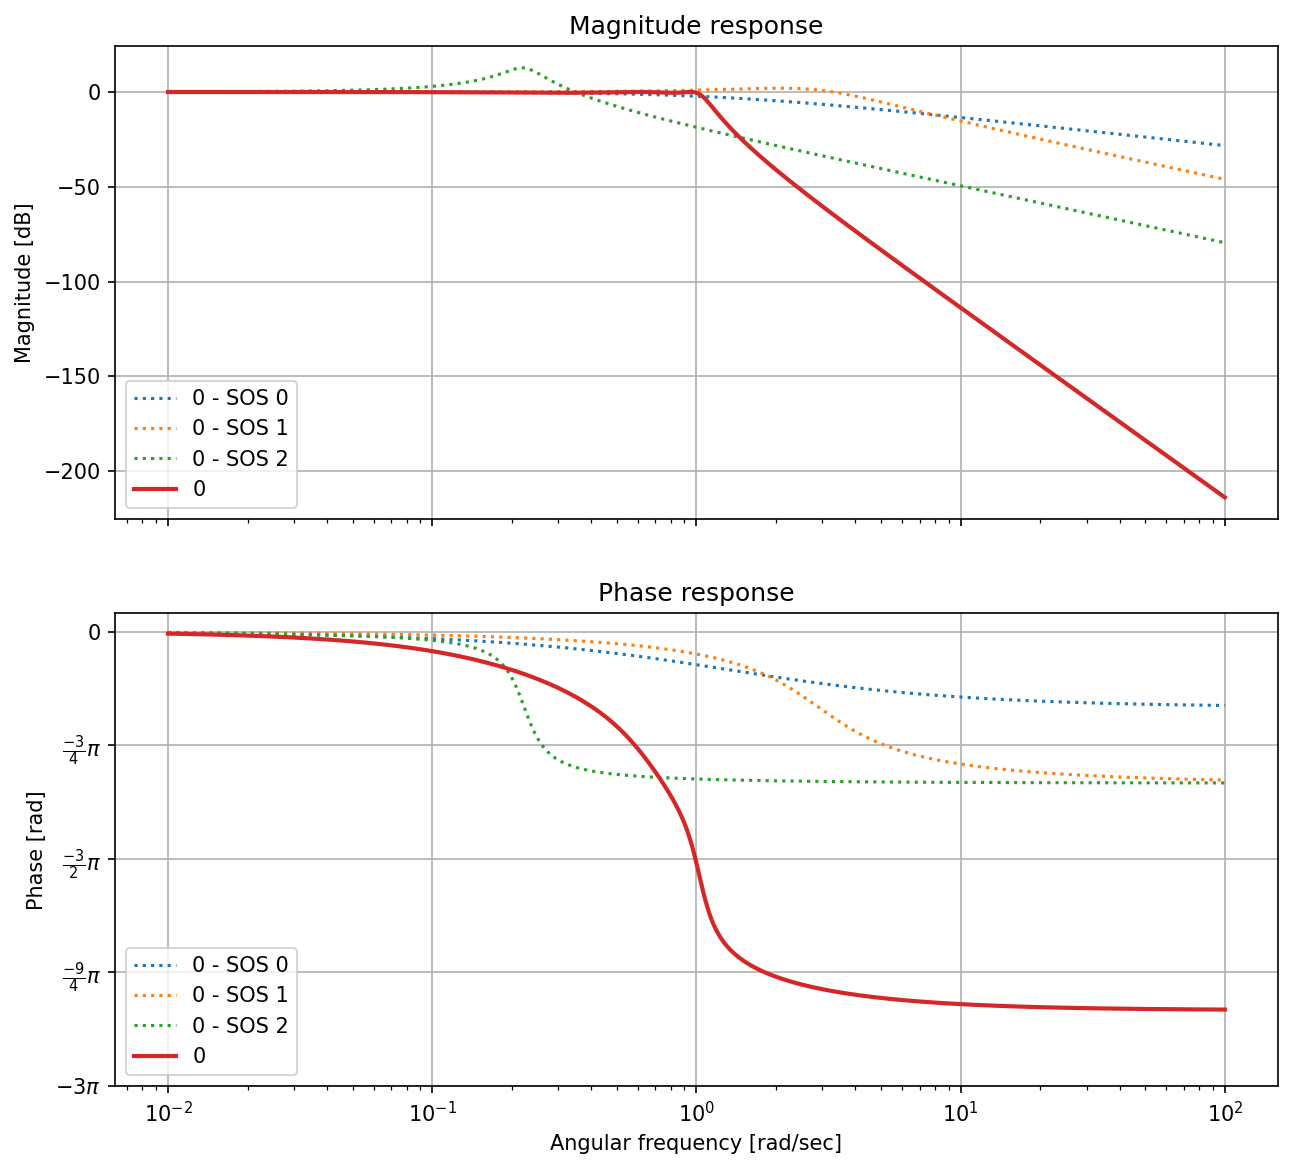

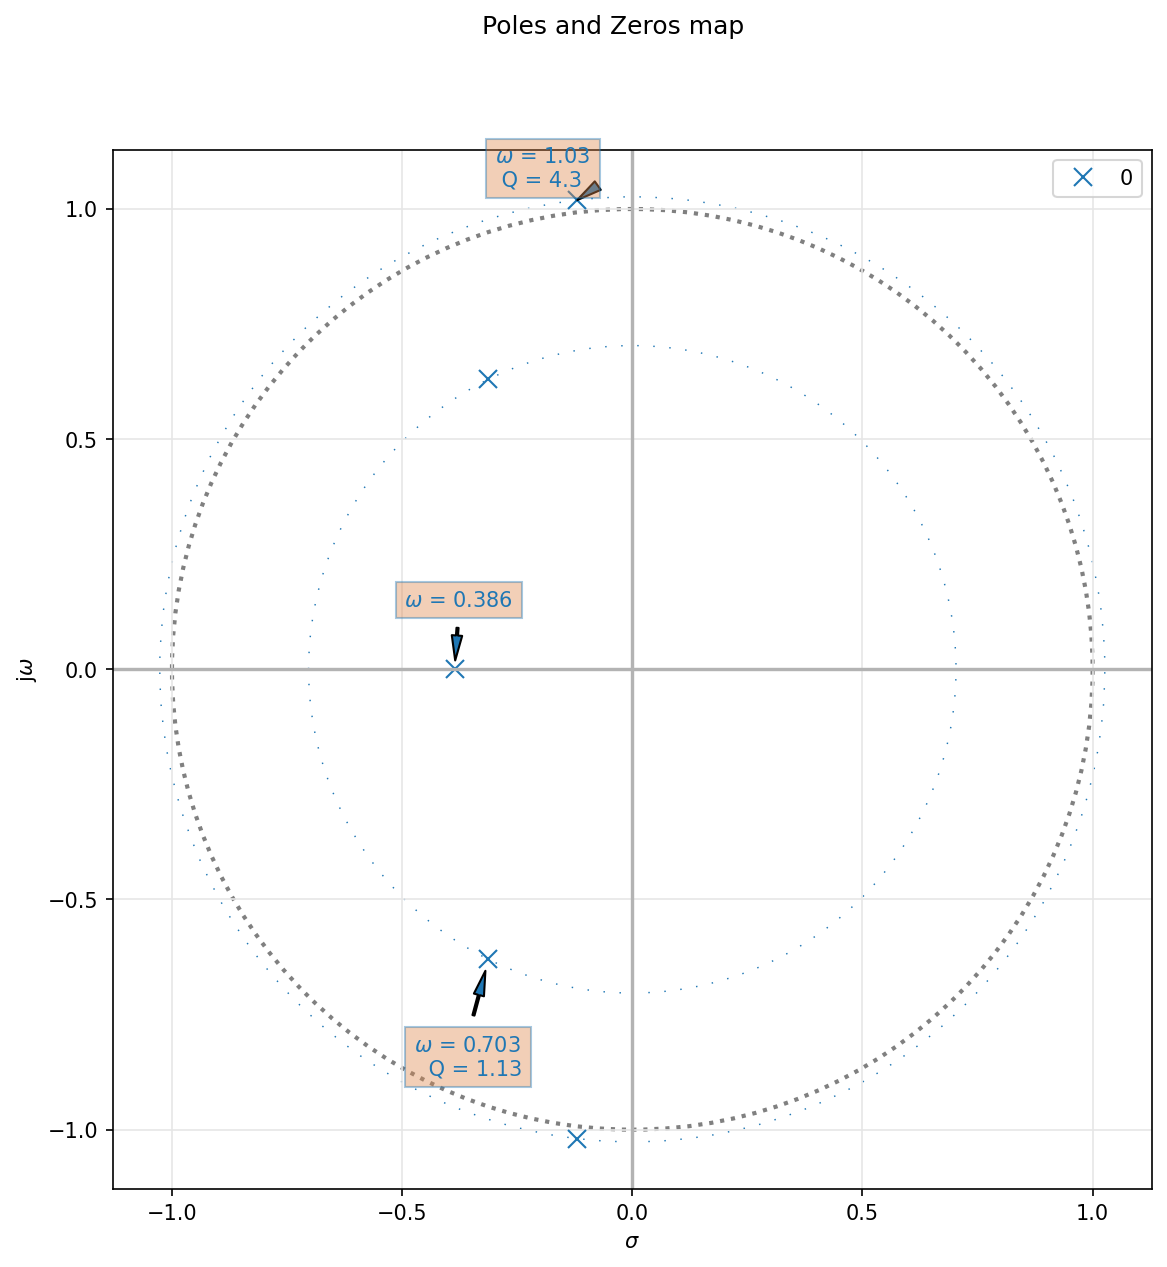

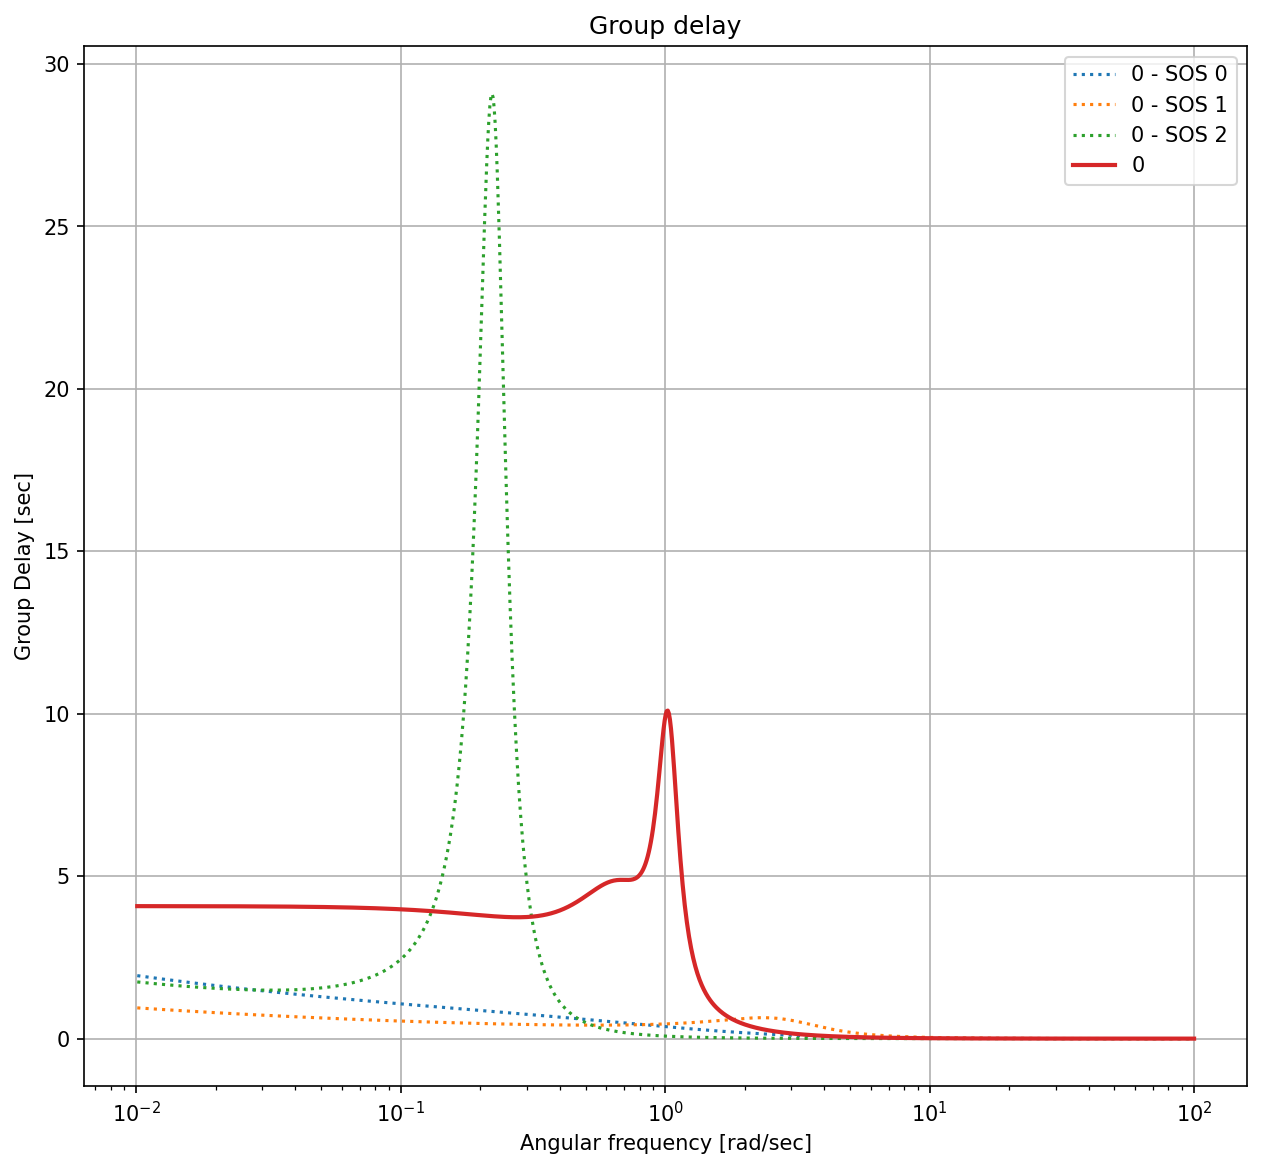

In [79]:
#-------------------------------------------------------------------------------------------------------------------#

# Inicializamos e importamos módulos

# Módulos externos
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math as m
import scipy.signal as sig

fig_sz_x = 10
fig_sz_y = 9
fig_dpi = 150 # dpi

fig_font_size = 12

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
#plt.rcParams.update({'font.size':fig_font_size})

#-------------------------------------------------------------------------------------------------------------------#

# Importamos las funciones de PyTC2

from pytc2.sistemas_lineales import analyze_sys
from pytc2.sistemas_lineales import pretty_print_bicuad_omegayq
from pytc2.sistemas_lineales import tf2sos_analog
from pytc2.sistemas_lineales import pretty_print_SOS
from pytc2.general import print_subtitle

#-------------------------------------------------------------------------------------------------------------------#

# Calculamos e^2
alfa_max = 0.4  # dB
alfa_min = 48   # dB
omega_p = 1     # norm omega_p
omega_s = 3     # norm omega_s

eps = np.sqrt(10**(alfa_max/10)-1)

print('#---------------------------------------------------------------------------------------------#')
print(' ')
print('-- ε: Grado de libertad de la funcion --')
print(' ')

print('ε = sqrt(10^(α_max/10)-1)')

print(' ')

print('ε = {:3.3f}'.format(eps))
print('ε^2 = {:3.3f}'.format(eps**2))

print(' ')
print('#---------------------------------------------------------------------------------------------#')

#-------------------------------------------------------------------------------------------------------------------#

# Calculamos N
# Iteramos alfa_min
print(' ')
print('-- N: Orden del filtro --')
print(' ')
print('α_min = 10*log(1 + ε^2*C_n^2) con C_n^2= cosh^2(N*cosh^(-1)(ω_s))')
print(' ')

for N in range(1,10):
    C_nn = (np.cosh(N*(np.arccosh(omega_s))))**2
    att = 10*np.log10(1+(eps**2)*C_nn)    
    print('Para N= {:d}: ¿att = {:3.3f} dB >= α_min= {:d}?'.format(N, att, alfa_min))
    if att >= alfa_min:
        break

print(' ')

# Elegimos N de forma tal que α_min >= 48 dB:
N= 5
print('N= {:d}'.format(N))

print(' ')
print('#---------------------------------------------------------------------------------------------#')

#-------------------------------------------------------------------------------------------------------------------#

# De la resolución analítica, obtenemos |T(jw)|^2:
# En función de eps^2:
num = [1]
den = [-256*eps**2, 0, -640*eps**2, 0, -560*eps**2, 0, 200*eps**2, 0, -25*eps**2, 0, 1]

# En función de los coeficientes k, a, b y c, d y e:
k = 256*eps**2
a = (640*eps**2)/k
b = (560*eps**2)/k  
c = (200*eps**2)/k    
d = (25*eps**2)/k
e = 1/k

num = [e]
den = [-1, 0, -a, 0, -b, 0, -c, 0, -d, 0, e]

"""
den_aux= np.roots(den)
den_aux_2= []
for i in range(len(np.roots(den))):
    if den_aux[i].real < 0:
        den_aux_2.append(den_aux[i])
"""

print(' ')
print('-- p_i: Polos en el semiplano derecho obtenidos con roots(p) --')
print('-- del polinomio denominador obtenido de forma analítica --')
print(' ')

den_aux= np.array(np.roots(den))
num_p= 0
for i in range(len(np.roots(den))):
    if den_aux[i].real < 0:
        print('p_{:d}= {}'.format(num_p, den_aux[i]))
        num_p+=1

print(' ')
print('#---------------------------------------------------------------------------------------------#')

#-------------------------------------------------------------------------------------------------------------------#

# Obtenemos singularidades con la función de aproximación de Chevyshev: cheb1ap(N, rp)
z,p,k = sig.cheb1ap(5, alfa_max)

print(' ')
print('-- p_i: Polos en el semiplano izquierdo obtenidos con cheb1ap(N, rp) --')
print('-- coincidentes con los obtenidos con roots(p) de forma analítica --')
print(' ')

print('{}'.format(p))

print(' ')
print('#---------------------------------------------------------------------------------------------#')

#-------------------------------------------------------------------------------------------------------------------#

# Transformamos las singularidades que nos devuelve cheb1ap(N, rp) para obtener el numerador y el denominador
# de la T(s) con zpk2tf(z,p,k)
num, den = sig.zpk2tf(z,p,k)

#-------------------------------------------------------------------------------------------------------------------#

# Transformamos (factorizamos) la T(s) en secciones de segundo orden (SOS) con la función tf2sos_analog()
this_sos = tf2sos_analog(num, den)

#-------------------------------------------------------------------------------------------------------------------#

# Imprimimos la T(s) en formato T(s)= num/den con la funcion pretty_print_SOS():
print(' ')
print('-- Función transferencia T(s): --')
print(' ')

pretty_print_SOS(this_sos)

print(' ')
print('#---------------------------------------------------------------------------------------------#')
print(' ')

#-------------------------------------------------------------------------------------------------------------------#

# Representamos módulo, fase, diagrama de polos y ceros y retardo de fase con la analyze_sys() que tiene, entre
# otras cosas, indicadores (w0 y Q) de las singularidades en el diagrama de polos y ceros


print('-- Módulo, fase, diagrama de polos y ceros y retardo de fase --')
print(' ')

analyze_sys(this_sos)

#-------------------------------------------------------------------------------------------------------------------#

